<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


In [1]:
!curl -L "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite" -o survey-results-public.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 17  201M   17 36.2M    0     0  22.7M      0  0:00:08  0:00:01  0:00:07 22.8M
 40  201M   40 82.0M    0     0  31.6M      0  0:00:06  0:00:02  0:00:04 31.6M
 81  201M   81  164M    0     0  45.7M      0  0:00:04  0:00:03  0:00:01 45.8M
100  201M  100  201M    0     0  50.0M      0  0:00:04  0:00:04 --:--:-- 50.0M


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


#### 2. Connect to the Database


**Install the needed libraries**


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')

In [3]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
df = pd.read_sql_query(QUERY, conn)
df


,Table_Name
0,main


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [6]:
QUERY = """
SELECT COUNT(*) as count
FROM main
"""

df = pd.read_sql_query(QUERY, conn)
df

,count
0,65437


#### Demo 2: List All Tables


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


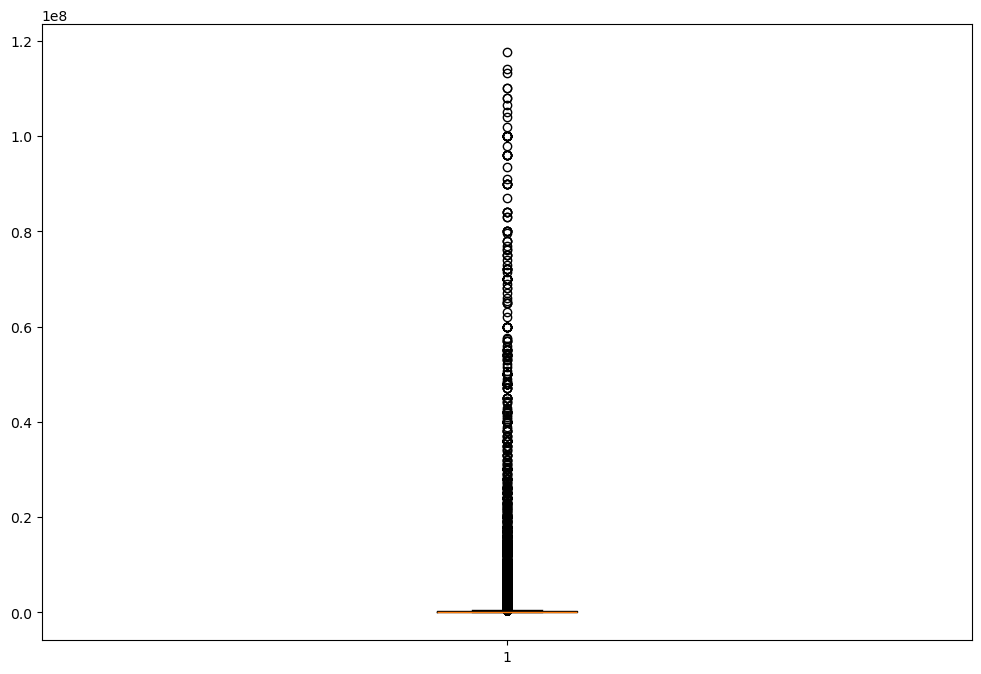

In [23]:
# your code goes here
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

df_comp = pd.read_sql_query(QUERY, conn)
df_comp

df_comp = df_comp[df_comp['CompTotal'] < df_comp['CompTotal'].quantile(0.99)]

plt.figure(figsize=(12, 8))
plt.boxplot(df_comp['CompTotal'])
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [16]:
# your code goes here
QUERY = """
SELECT Age
FROM main
"""

df_age = pd.read_sql_query(QUERY, conn)

df_age

,Age
0,Under 18 years old
1,35-44 years old
2,45-54 years old
3,18-24 years old
4,18-24 years old
...,...
65432,18-24 years old
65433,25-34 years old
65434,25-34 years old
65435,18-24 years old


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


<Figure size 1400x800 with 0 Axes>

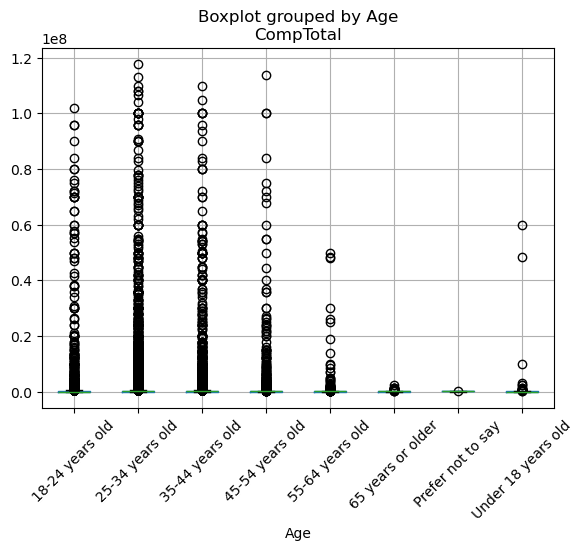

In [21]:
# your code goes here
QUERY = """
SELECT CompTotal, Age
FROM main
WHERE CompTotal IS NOT NULL 
AND Age IS NOT NULL
"""

df_comp_age = pd.read_sql_query(QUERY, conn)
df_comp_age

df_comp_age = df_comp_age[df_comp_age['CompTotal'] < df_comp_age['CompTotal'].quantile(0.99)]

plt.figure(figsize=(14, 8))
df_comp_age.boxplot(column='CompTotal', by='Age', rot=45)

plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


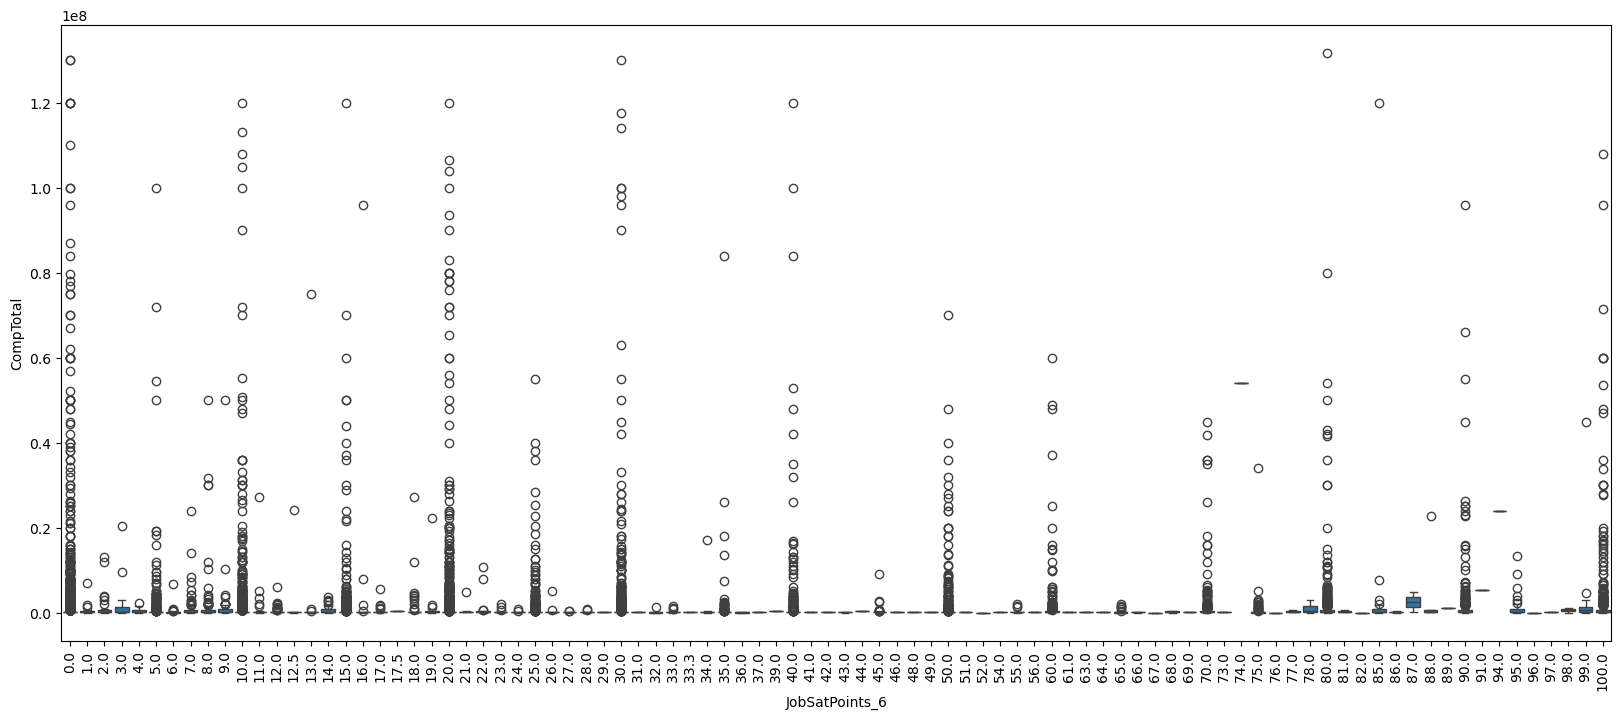

In [40]:
# your code goes here
QUERY = """
SELECT CompTotal, JobSatPoints_6
FROM main
WHERE CompTotal IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""

df_jobsat = pd.read_sql_query(QUERY, conn)

df_jobsat = df_jobsat[df_jobsat['CompTotal'] < df_jobsat['CompTotal'].quantile(0.99)]

import seaborn as sns

plt.figure(figsize=(20, 8))
sns.boxplot(data=df_jobsat, x='JobSatPoints_6', y='CompTotal')
plt.xticks(rotation = 90)
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


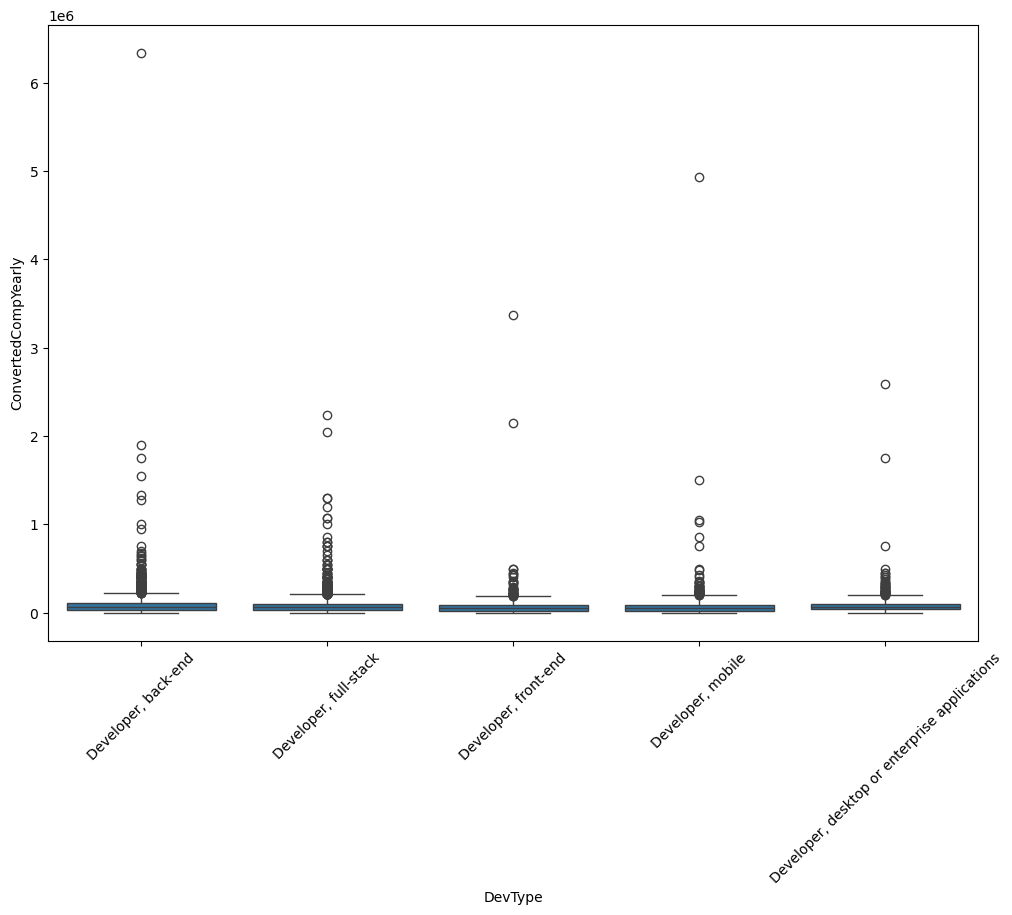

In [ ]:
# your code goes here
QUERY = """
SELECT ConvertedCompYearly, DevType 
FROM main
WHERE ConvertedCompYearly IS NOT NULL
AND DevType IS NOT NULL
"""

df_dev = pd.read_sql_query(QUERY, conn)
df_dev['DevType'] = df_dev['DevType'].str.strip()

top5 = df_dev['DevType'].value_counts().head(5).index
df_top5 = df_dev[df_dev['DevType'].isin(top5)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top5, x = 'DevType', y='ConvertedCompYearly')
plt.xticks(rotation = 45)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


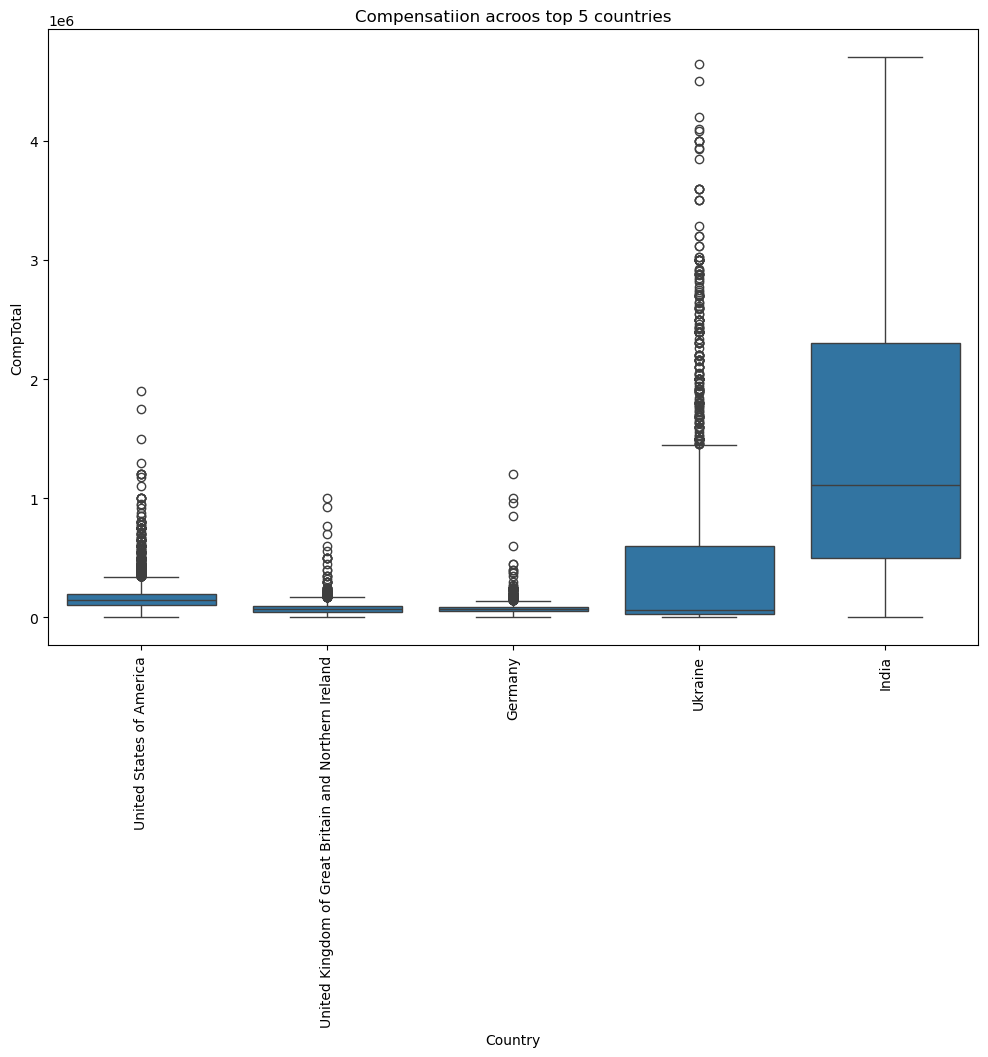

In [57]:
# your code goes here
QUERY = """
SELECT CompTotal, Country 
FROM main
WHERE CompTotal IS NOT NULL
AND Country IS NOT NULL
"""

df_country = pd.read_sql_query(QUERY, conn)
df_country['Country'] = df_country['Country'].str.strip()

top5 = df_country['Country'].value_counts().head(5).index
df_top5 = df_country[df_country['Country'].isin(top5)]

df_top5 = df_top5[df_top5['CompTotal'] < df_top5['CompTotal'].quantile(0.99)]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top5, x = 'Country', y='CompTotal')
plt.title('Compensatiion acroos top 5 countries')
plt.xticks(rotation = 90)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


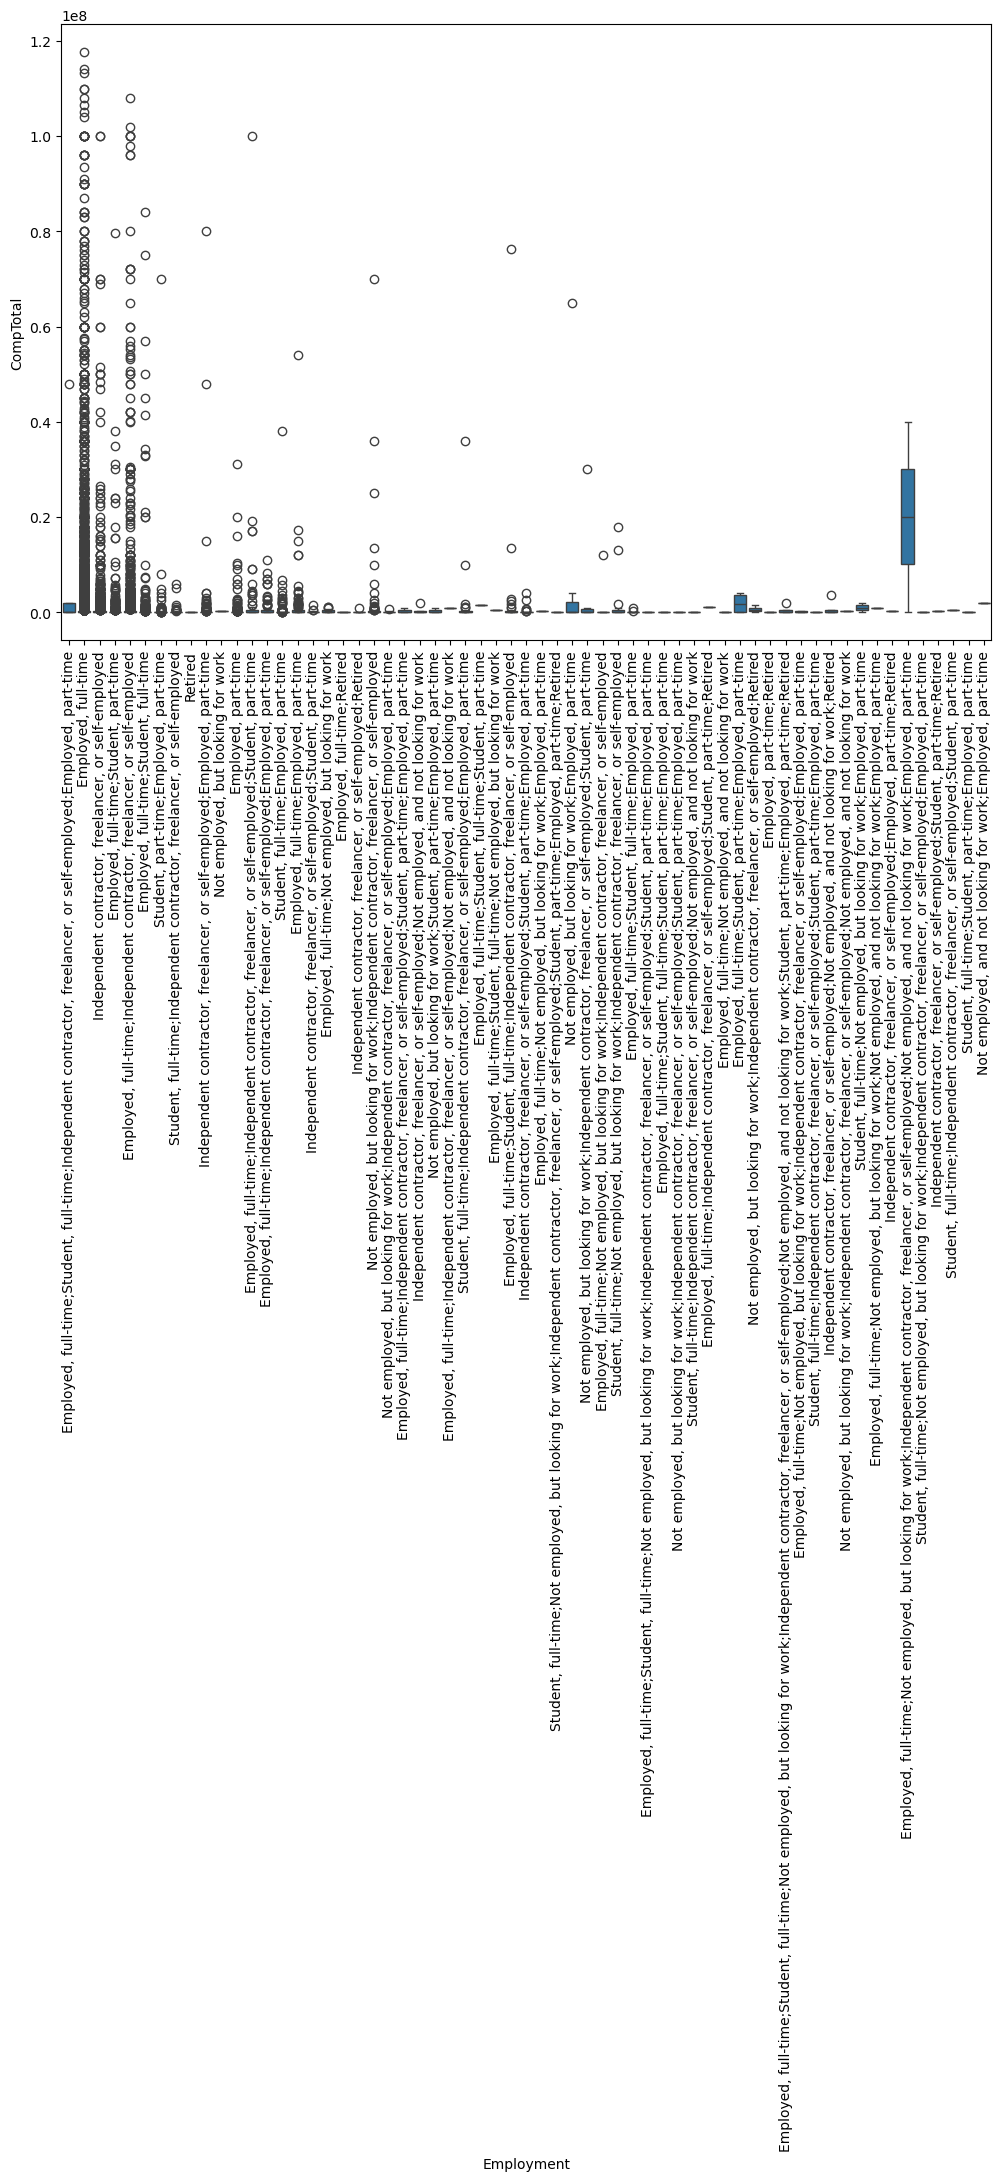

In [65]:
# your code goes here
QUERY = """
SELECT CompTotal,Employment
FROM main
WHERE CompTotal IS NOT NULL
AND Employment IS NOT NULL
"""

df_emp = pd.read_sql_query(QUERY, conn)

df_emp['Employment'] = df_emp['Employment'].str.strip()

upper = df_emp['CompTotal'].quantile(0.99)
df_emp = df_emp[df_emp['CompTotal'] < upper]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_emp, x = 'Employment', y='CompTotal')
plt.xticks(rotation = 90)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


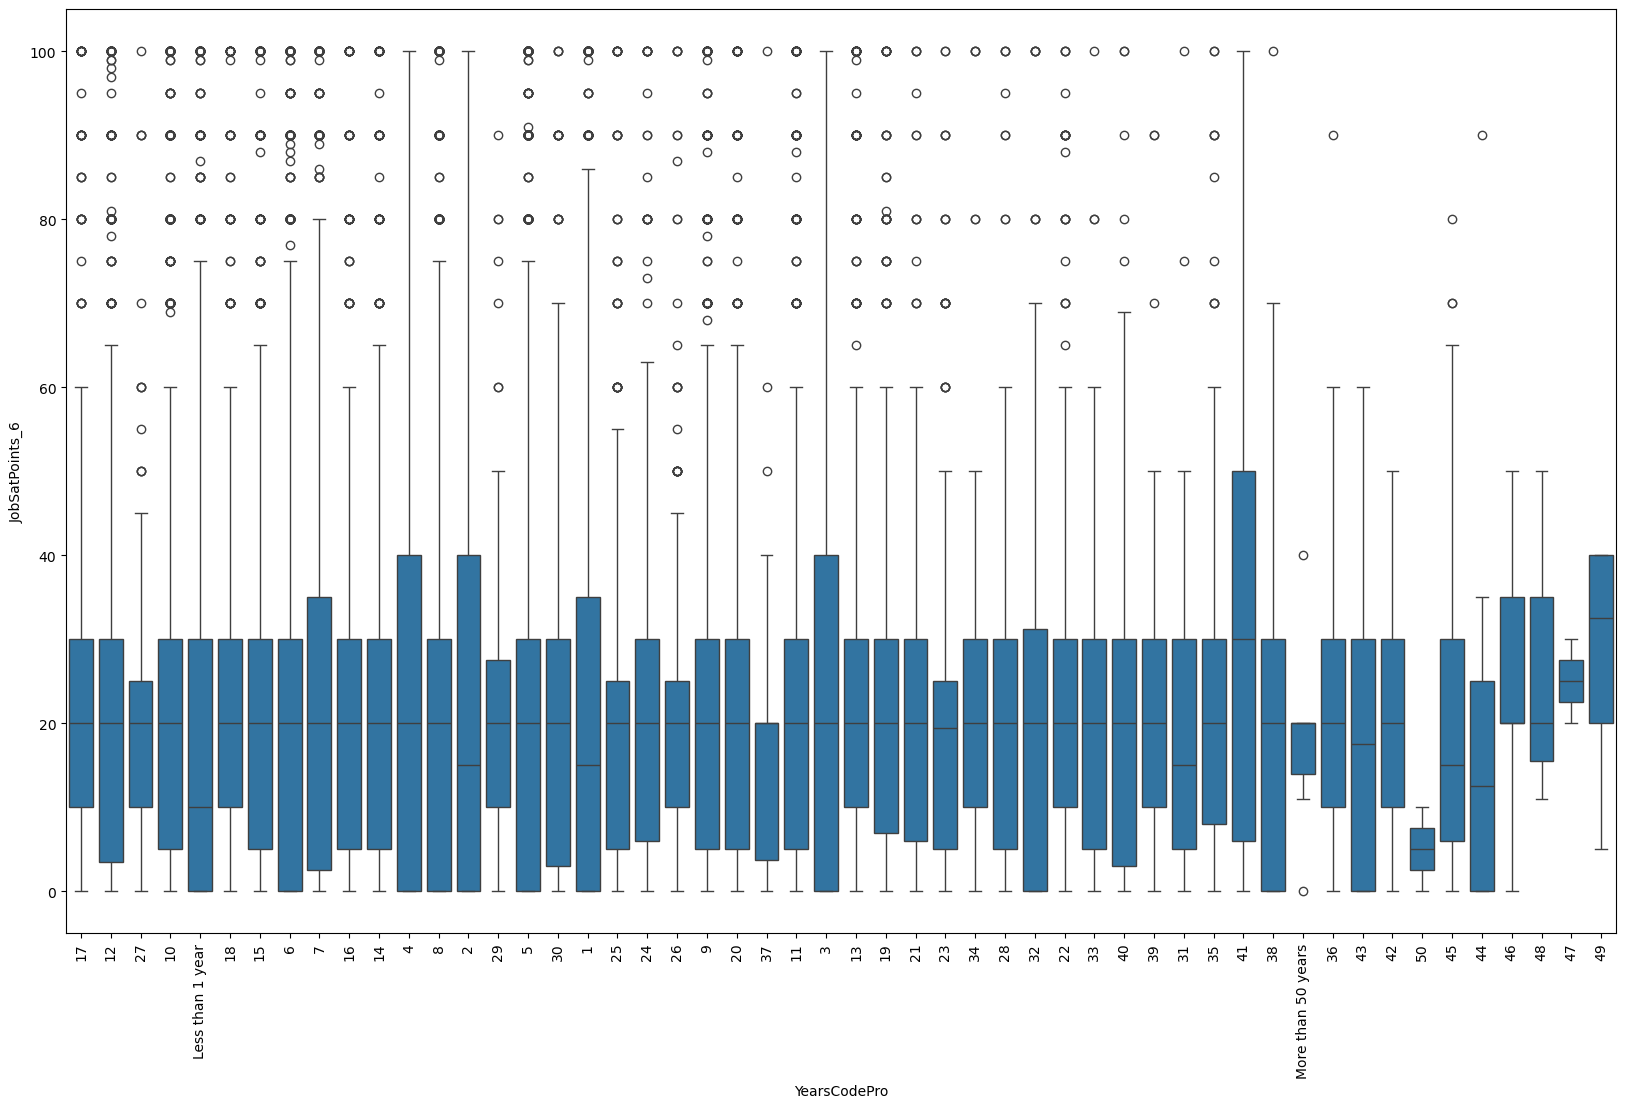

In [66]:
# your code goes here
QUERY = """
SELECT YearsCodePro,JobSatPoints_6
FROM main
WHERE YearsCodePro IS NOT NULL
AND JobSatPoints_6 IS NOT NULL
"""

df_code = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(20, 12))
sns.boxplot(data=df_code, x = 'YearsCodePro', y='JobSatPoints_6')
plt.xticks(rotation = 90)
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [67]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
